In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from typing import List, Tuple

In [2]:
# Constants representing the forest states
BURNT = 0       # Burnt land
MEADOW = 1      # Grass
LIGHT_WOOD = 2  # Sparse forest
THICK_WOOD = 3  # Dense forest
FLAMES = 4      # Fire

# Colors for visualization
COLOR_MAP = ListedColormap(['black', 'lightgreen', 'forestgreen', 'darkgreen', 'red'])

In [3]:
def initialize_forest(grid_size: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Initializes the forest grid and timer grid.

    Args:
        grid_size (int): Size of the grid.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Initialized forest and timer grids.
    """
    forest = np.random.choice(
        [BURNT, MEADOW, LIGHT_WOOD, THICK_WOOD],
        size=(grid_size, grid_size),
        p=[0.1, 0.2, 0.3, 0.4]
    )
    timers = np.zeros((grid_size, grid_size), dtype=int)

    # Ignite the center cell
    center = grid_size // 2
    forest[center, center] = FLAMES

    return forest, timers


def evolve_forest(
    forest: np.ndarray, 
    timers: np.ndarray, 
    fire_prob_light: float, 
    fire_prob_thick: float
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Updates the forest grid and timers for the next timestep.

    Args:
        forest (np.ndarray): Current forest grid.
        timers (np.ndarray): Current timer grid.
        fire_prob_light (float): Fire spread probability for sparse forest.
        fire_prob_thick (float): Fire spread probability for dense forest.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Updated forest and timer grids.
    """
    grid_size = forest.shape[0]
    new_forest = forest.copy()
    new_timers = timers.copy()

    for x in range(1, grid_size - 1):
        for y in range(1, grid_size - 1):
            state, timer = forest[x, y], timers[x, y]

            if state == FLAMES:
                if timer < 2:
                    new_timers[x, y] += 1
                else:
                    new_forest[x, y] = BURNT
                    new_timers[x, y] = 0

                for nx, ny in [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]:
                    if new_forest[nx, ny] in [MEADOW, LIGHT_WOOD, THICK_WOOD]:
                        prob = {MEADOW: 0.1, LIGHT_WOOD: fire_prob_light, THICK_WOOD: fire_prob_thick}[new_forest[nx, ny]]
                        if np.random.rand() < prob:
                            new_forest[nx, ny] = FLAMES
                            new_timers[nx, ny] = 0

            elif state == MEADOW and timer >= np.random.randint(20, 50):
                new_forest[x, y] = LIGHT_WOOD
                new_timers[x, y] = 10

            elif state == LIGHT_WOOD and timer >= 49:
                new_forest[x, y] = THICK_WOOD
                new_timers[x, y] = 50

            else:
                new_timers[x, y] += 1

    return new_forest, new_timers


def simulate_fire(
    fire_prob_light: float, 
    fire_prob_thick: float, 
    steps: int, 
    grid_size: int, 
    display_steps: List[int]
) -> None:
    """
    Simulates forest fire and visualizes the results.

    Args:
        fire_prob_light (float): Fire spread probability for sparse forest.
        fire_prob_thick (float): Fire spread probability for dense forest.
        steps (int): Total number of simulation steps.
        grid_size (int): Size of the grid.
        display_steps (List[int]): Steps to visualize the grid state.
    """
    forest, timers = initialize_forest(grid_size)

    # Statistics storage
    burnt_stats, meadow_stats, light_wood_stats, thick_wood_stats, flame_stats = [], [], [], [], []

    fig, axes = plt.subplots(1, len(display_steps), figsize=(20, 4))

    for step in range(steps + 1):
        burnt_stats.append(np.sum(forest == BURNT))
        meadow_stats.append(np.sum(forest == MEADOW))
        light_wood_stats.append(np.sum(forest == LIGHT_WOOD))
        thick_wood_stats.append(np.sum(forest == THICK_WOOD))
        flame_stats.append(np.sum(forest == FLAMES))

        if step in display_steps:
            ax = axes[display_steps.index(step)]
            ax.imshow(forest, cmap=COLOR_MAP, vmin=0, vmax=4)
            ax.set_title(f"Step {step}")
            ax.axis("off")

        forest, timers = evolve_forest(forest, timers, fire_prob_light, fire_prob_thick)

    plt.tight_layout()
    plt.show()

    # Plotting statistics
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))

    ax[0].plot(burnt_stats, label="Burnt")
    ax[0].plot(meadow_stats, label="Meadow")
    ax[0].plot(light_wood_stats, label="Light Wood")
    ax[0].plot(thick_wood_stats, label="Thick Wood")
    ax[0].plot(flame_stats, label="Flames")
    ax[0].set_title("Cell State Counts Over Time")
    ax[0].set_xlabel("Steps")
    ax[0].set_ylabel("Cell Count")
    ax[0].legend()

    ax[1].plot(flame_stats, label="Flames")
    ax[1].set_title("Fire Spread Over Time")
    ax[1].set_xlabel("Steps")
    ax[1].set_ylabel("Number of Flaming Cells")
    ax[1].legend()

    plt.tight_layout()
    plt.show()

Simulating with Light Fire Spread: 0.3, Thick Fire Spread: 0.7


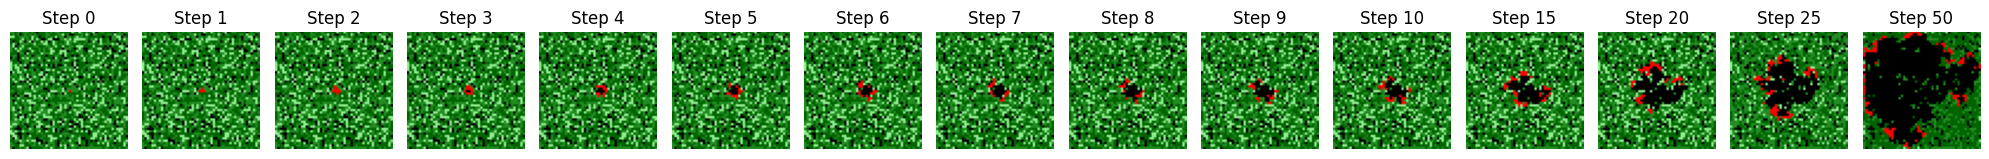

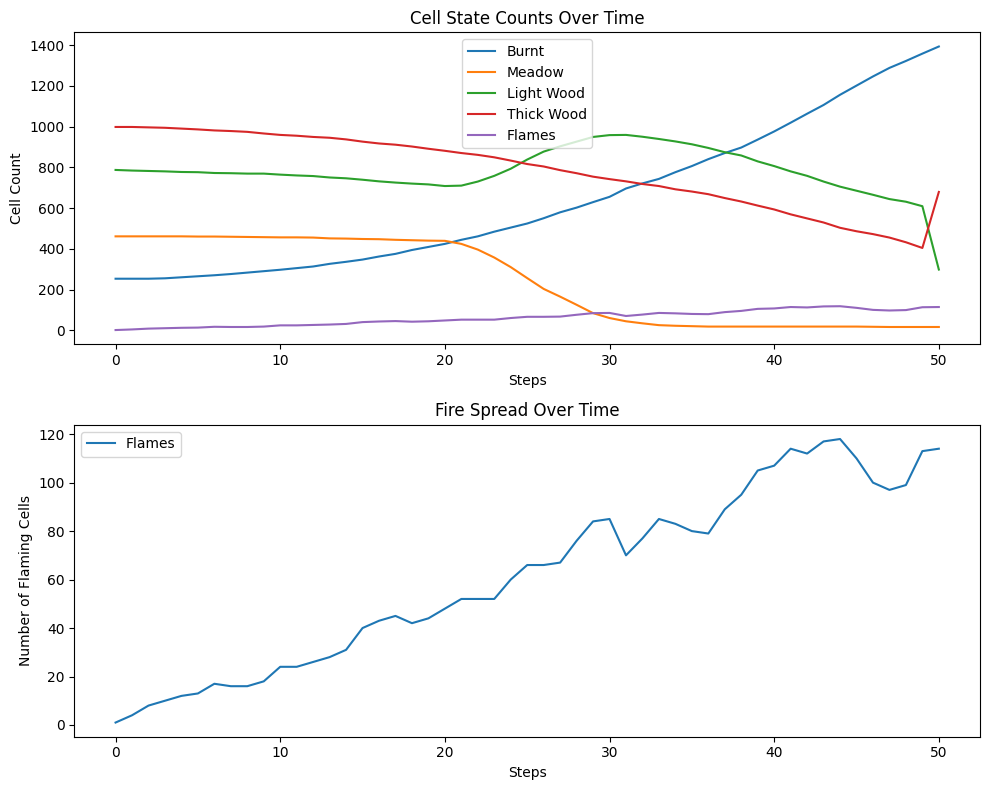

Simulating with Light Fire Spread: 0.5, Thick Fire Spread: 0.9


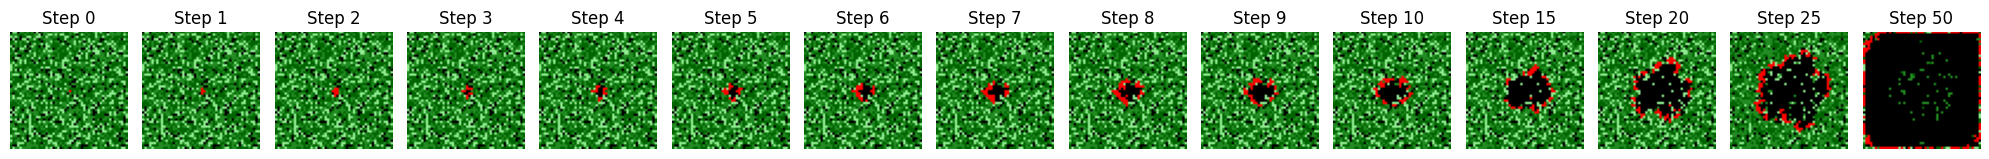

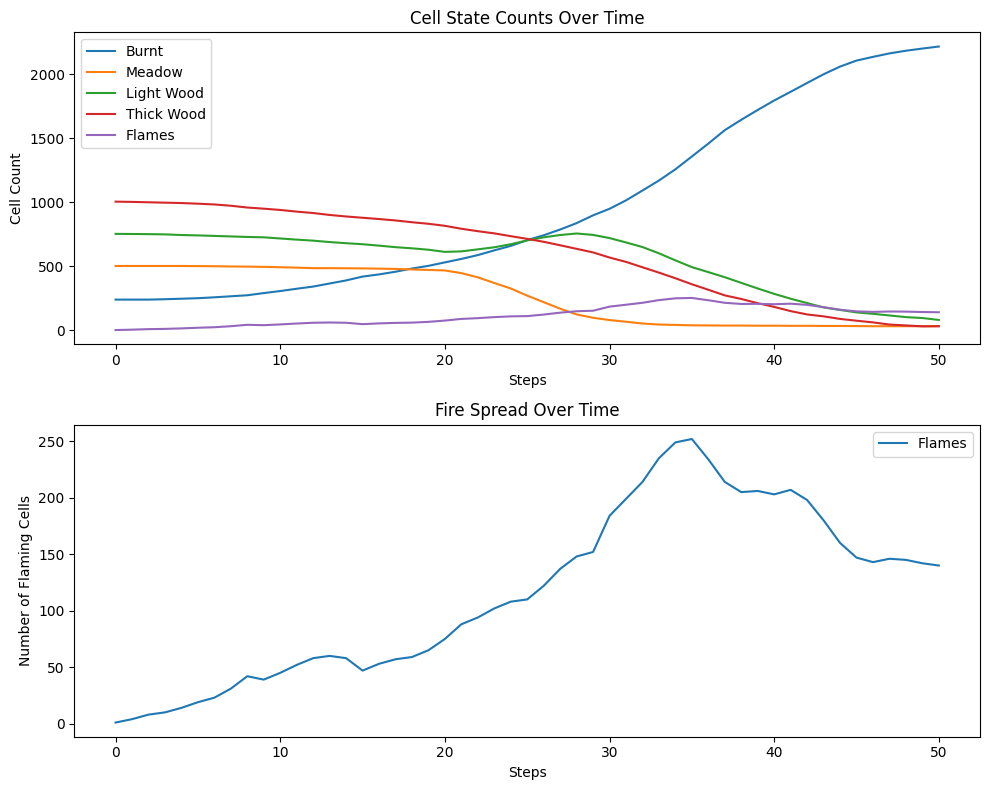

Simulating with Light Fire Spread: 0.7, Thick Fire Spread: 1.0


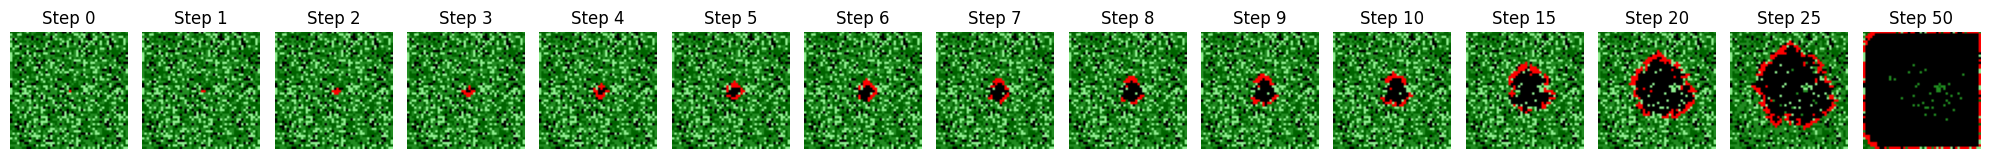

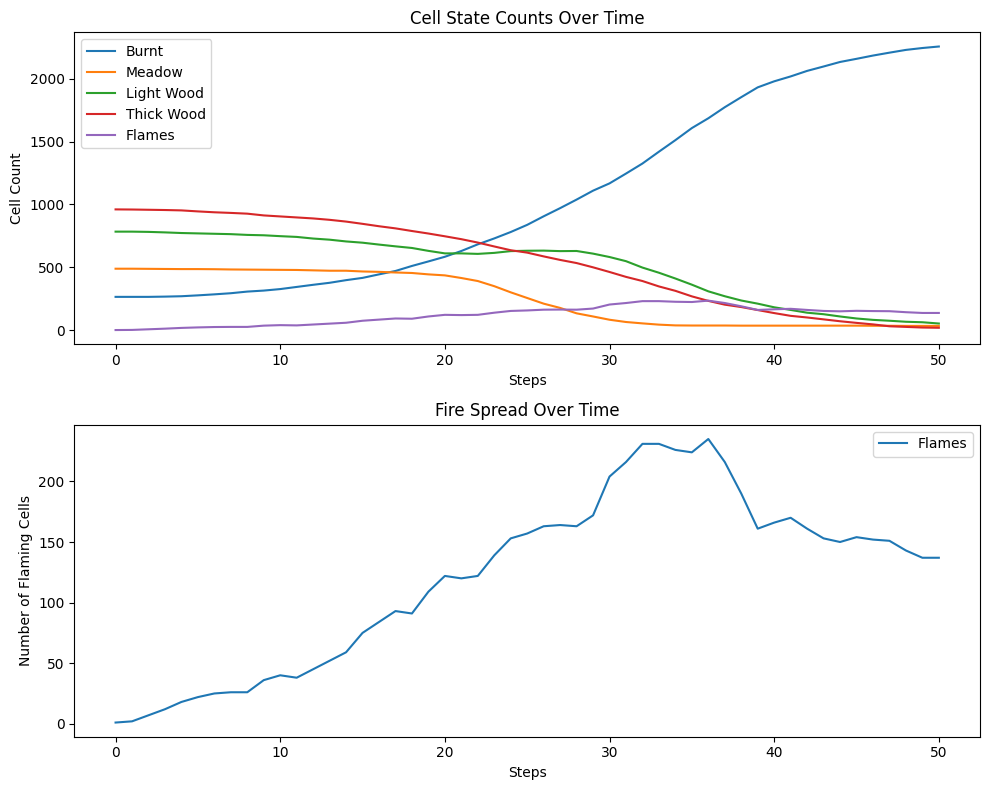

In [4]:
# Run simulations with different parameters
parameters = [
    (0.3, 0.7),
    (0.5, 0.9),
    (0.7, 1.0)
]

for fire_prob_light, fire_prob_thick in parameters:
    print(f"Simulating with Light Fire Spread: {fire_prob_light}, Thick Fire Spread: {fire_prob_thick}")
    steps_iterations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50]
    simulate_fire(fire_prob_light, fire_prob_thick, steps=50, grid_size=50, display_steps=steps_iterations)

In [5]:
# Constants for cell states
HEALTHY = 0  # Healthy cell
IMMUNE = -1  # Immune cell (negative values represent immunity duration)
INFECTED = 1  # Infected cell (positive values represent infection duration)

# Color map for visualization
COLOR_MAP = ListedColormap(["blue", "green", "red"])

# Simulation parameters
GRID_SIZE = 50  # Size of the grid (GRID_SIZE x GRID_SIZE)
STEPS = 50  # Number of time steps
SNAPSHOT_INTERVAL = 5  # Interval for snapshots

# Parameter ranges for testing
INFECTION_PROBABILITIES = [0.2, 0.3, 0.4]
IMMUNITY_DECAY_PROBABILITIES = [0.05, 0.2]
INFECTION_DURATIONS = [5]
IMMUNITY_DURATIONS = [7]

In [6]:
def initialize_population(grid_size: int) -> np.ndarray:
    """Initializes the population grid with a single infected cell at the center.

    Args:
        grid_size (int): Size of the grid.

    Returns:
        np.ndarray: Initialized population grid.
    """
    population = np.zeros((grid_size, grid_size), dtype=int)
    population[grid_size // 2, grid_size // 2] = INFECTED
    return population


def update_population(
    population: np.ndarray,
    infection_probability: float,
    immunity_decay_probability: float,
    infection_duration: int,
    immunity_duration: int
) -> np.ndarray:
    """Updates the state of the population based on the simulation rules.

    Args:
        population (np.ndarray): Current state of the population.
        infection_probability (float): Probability of infection.
        immunity_decay_probability (float): Probability of immunity decay.
        infection_duration (int): Duration of the infection.
        immunity_duration (int): Duration of immunity.

    Returns:
        np.ndarray: Updated population grid.
    """
    new_population = population.copy()
    grid_size = population.shape[0]

    for x in range(grid_size):
        for y in range(grid_size):
            cell = population[x, y]

            # Get neighbors with wrapping (torus)
            neighbors = population[(x-1):(x+2), (y-1):(y+2)].flatten()

            if cell == HEALTHY:
                if np.any(neighbors > 0) and np.random.rand() < infection_probability:
                    new_population[x, y] = INFECTED

            elif cell > 0:
                if cell < infection_duration:
                    new_population[x, y] += 1
                else:
                    new_population[x, y] = -immunity_duration

            elif cell < 0:
                if np.random.rand() < immunity_decay_probability:
                    new_population[x, y] += 1

    return new_population


def run_simulation(
    infection_probability: float,
    immunity_decay_probability: float,
    infection_duration: int,
    immunity_duration: int,
    steps: int,
    grid_size: int,
    snapshots: List[int]
) -> Tuple[List[int], List[int], List[int]]:
    """Runs the epidemic simulation and collects statistics.

    Args:
        infection_probability (float): Probability of infection.
        immunity_decay_probability (float): Probability of immunity decay.
        infection_duration (int): Duration of the infection.
        immunity_duration (int): Duration of immunity.
        steps (int): Number of simulation steps.
        grid_size (int): Size of the grid.
        snapshots (List[int]): Time steps for taking snapshots.

    Returns:
        Tuple[List[int], List[int], List[int]]: Statistics for healthy, immune, and infected cells.
    """
    population = initialize_population(grid_size)

    healthy_stats = []
    immune_stats = []
    infected_stats = []

    fig, axes = plt.subplots(1, len(snapshots), figsize=(20, 4))

    for step in range(steps):
        # Record statistics
        healthy_stats.append(np.sum(population == HEALTHY))
        immune_stats.append(np.sum(population < 0))
        infected_stats.append(np.sum((population > 0) & (population <= infection_duration)))

        # Save snapshots for visualization
        if step in snapshots:
            idx = snapshots.index(step)
            ax = axes[idx]
            ax.imshow(population, cmap=COLOR_MAP, vmin=-immunity_duration, vmax=infection_duration)
            ax.set_title(f"Step {step}")
            ax.axis("off")

        # Update population
        population = update_population(
            population, infection_probability, immunity_decay_probability, infection_duration, immunity_duration
        )

    plt.tight_layout()
    plt.show()

    return healthy_stats, immune_stats, infected_stats

Testing with p=0.2, q=0.05, ti=5, tv=7


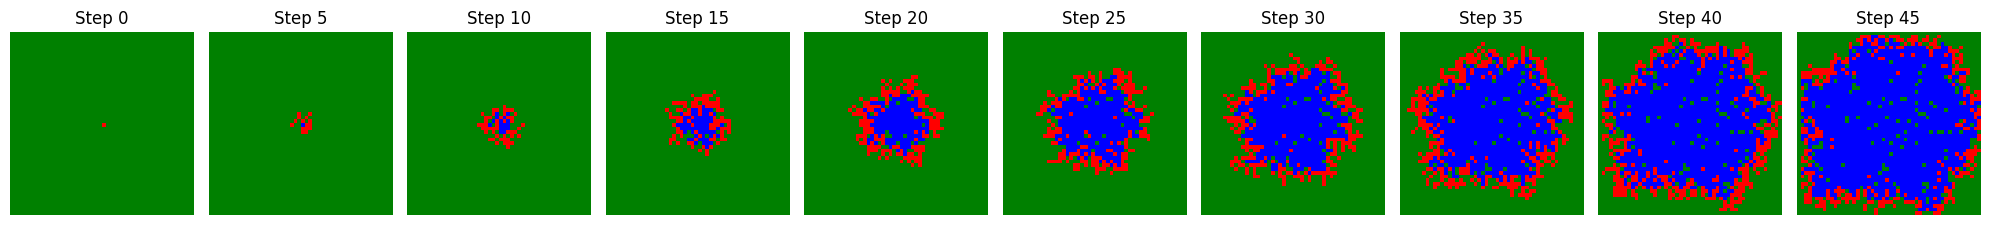

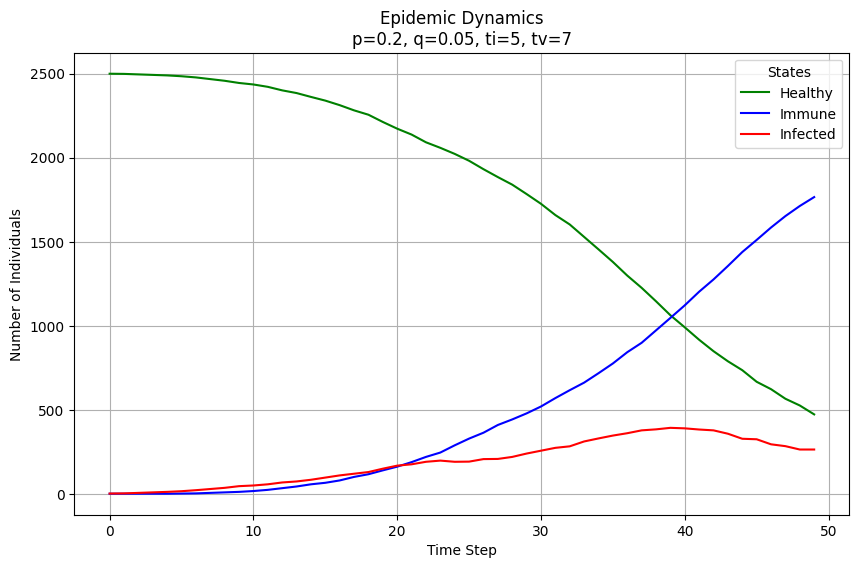

Testing with p=0.2, q=0.2, ti=5, tv=7


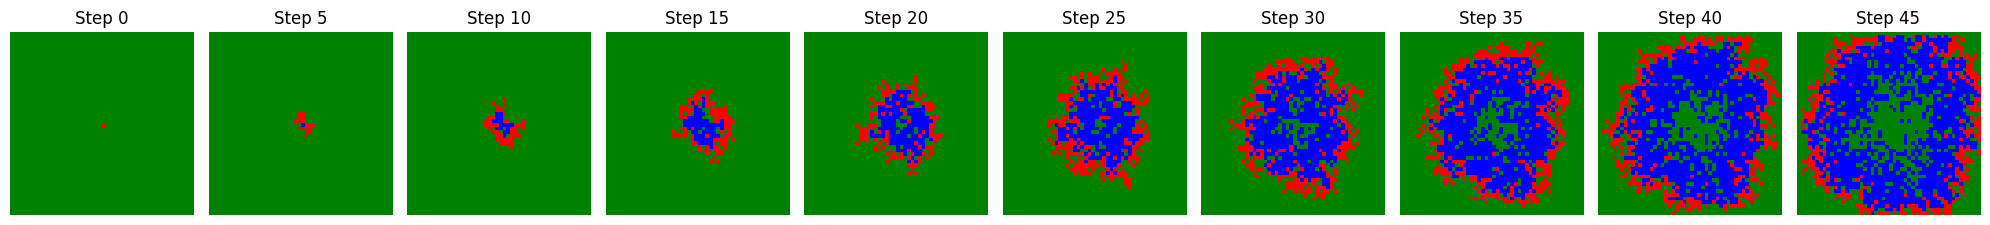

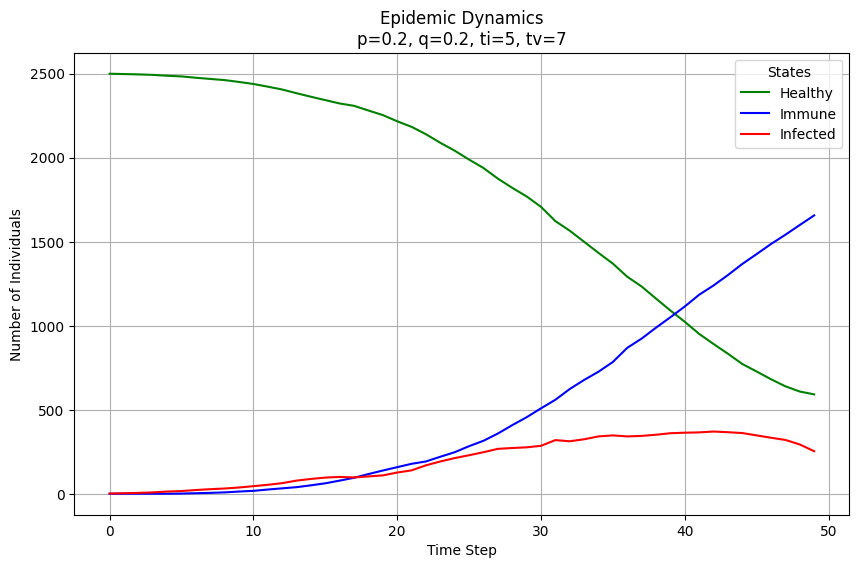

Testing with p=0.3, q=0.05, ti=5, tv=7


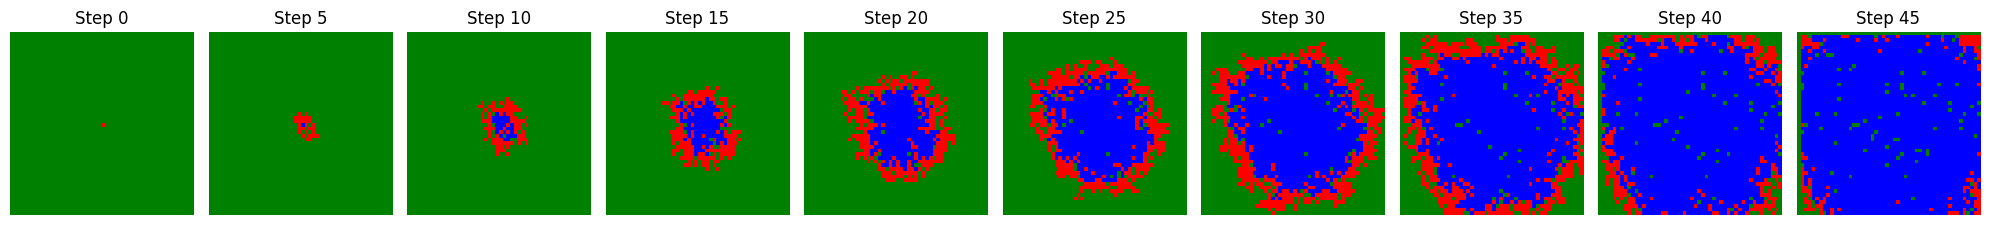

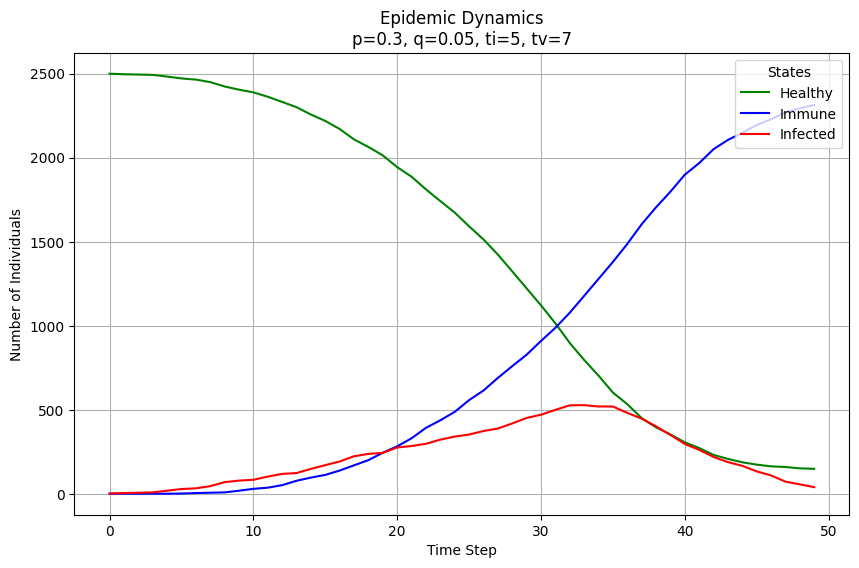

Testing with p=0.3, q=0.2, ti=5, tv=7


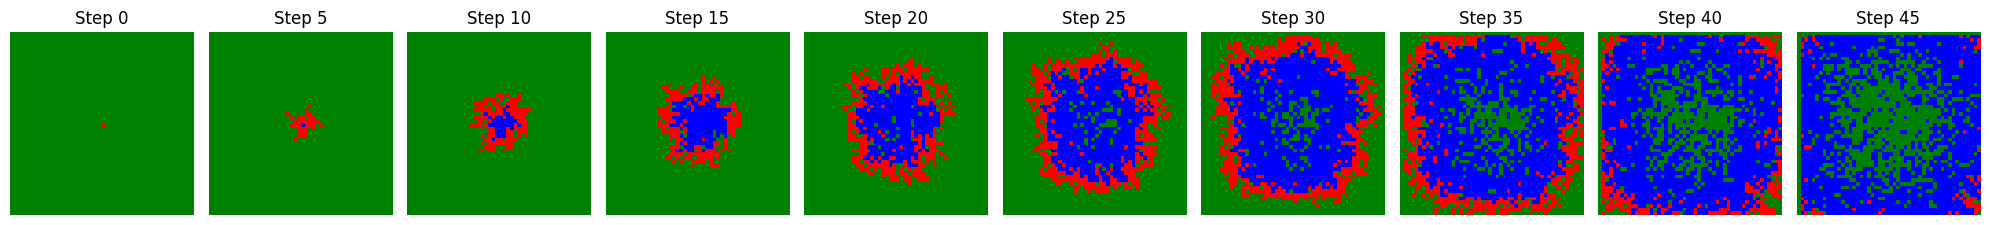

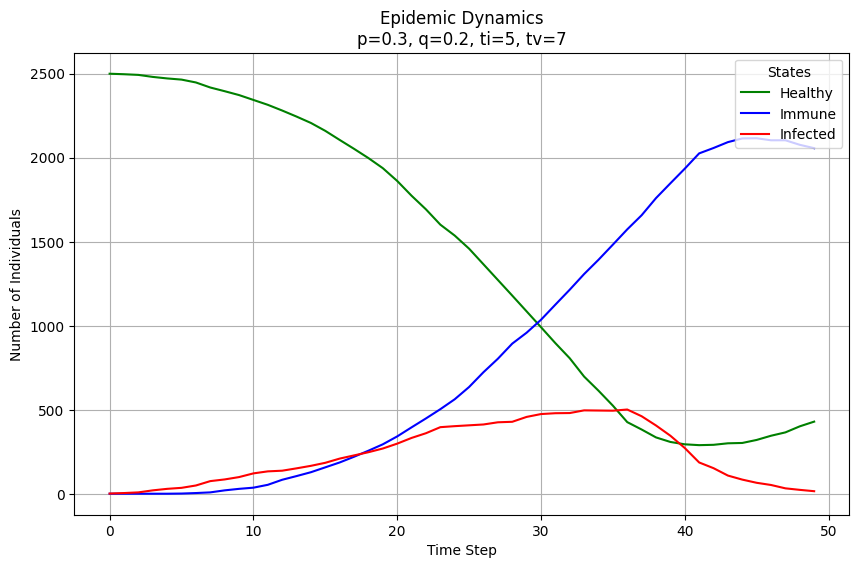

Testing with p=0.4, q=0.05, ti=5, tv=7


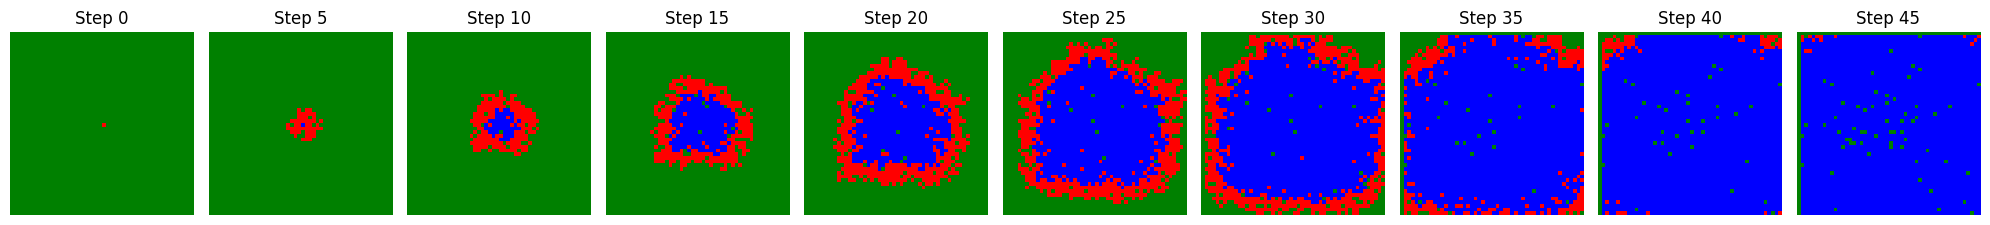

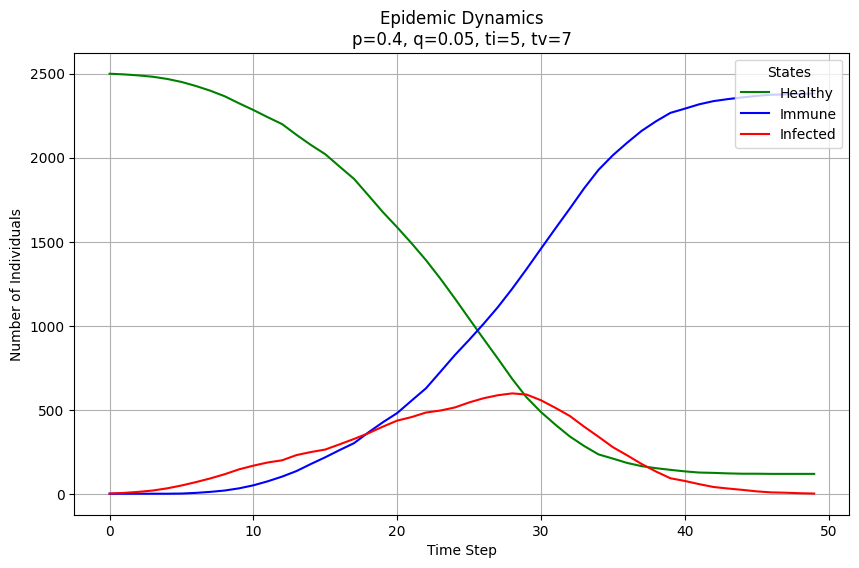

Testing with p=0.4, q=0.2, ti=5, tv=7


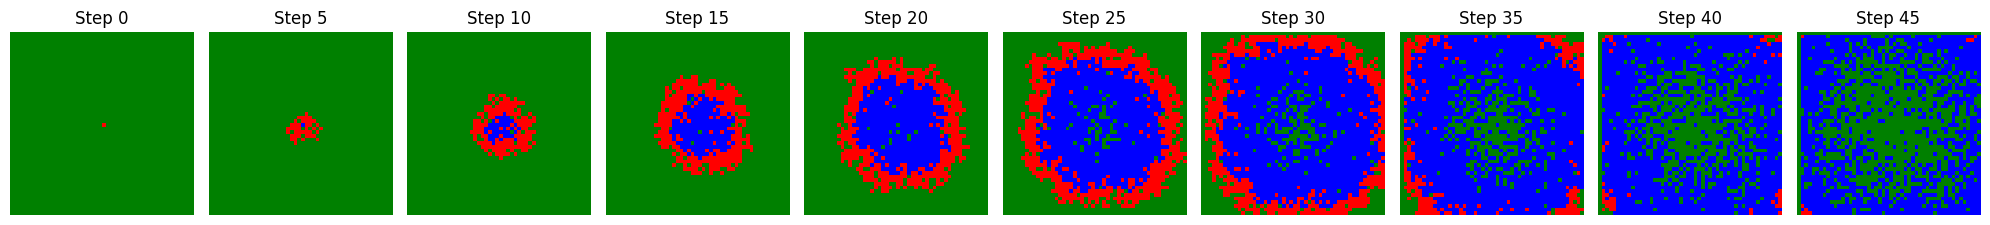

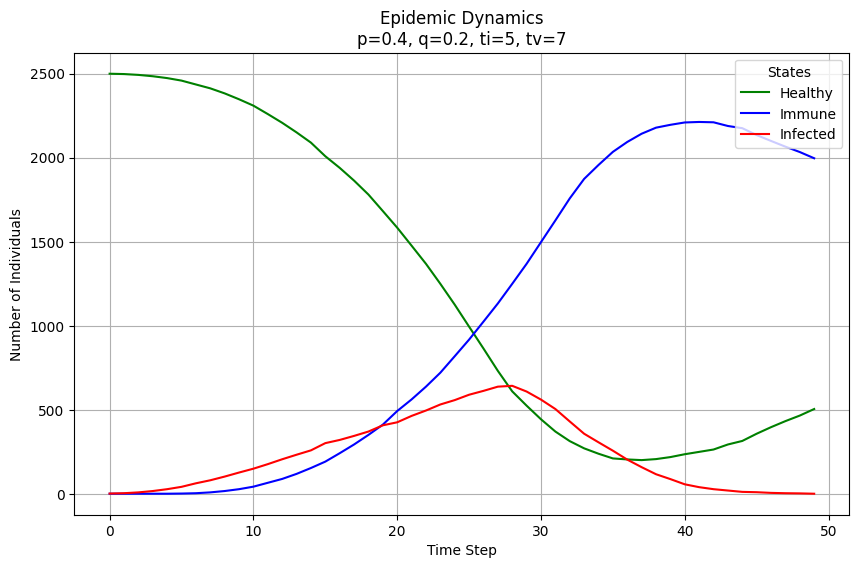

In [7]:
snapshots = list(range(0, STEPS, SNAPSHOT_INTERVAL))

for infection_probability in INFECTION_PROBABILITIES:
    for immunity_decay_probability in IMMUNITY_DECAY_PROBABILITIES:
        for infection_duration in INFECTION_DURATIONS:
            for immunity_duration in IMMUNITY_DURATIONS:
                print(f"Testing with p={infection_probability}, q={immunity_decay_probability}, ti={infection_duration}, tv={immunity_duration}")

                healthy_stats, immune_stats, infected_stats = run_simulation(
                    infection_probability, immunity_decay_probability,
                    infection_duration, immunity_duration, STEPS, GRID_SIZE, snapshots
                )

                # Plot dynamics
                plt.figure(figsize=(10, 6))
                plt.plot(healthy_stats, label="Healthy", color="green")
                plt.plot(immune_stats, label="Immune", color="blue")
                plt.plot(infected_stats, label="Infected", color="red")
                plt.xlabel("Time Step")
                plt.ylabel("Number of Individuals")
                plt.title(f"Epidemic Dynamics\np={infection_probability}, q={immunity_decay_probability}, ti={infection_duration}, tv={immunity_duration}")
                plt.legend(title="States", loc="upper right")
                plt.grid(True)
                plt.show()